**Exercise 13.21**. Graph the theoretical spectral density for an AR(2) process with $\phi_1 = 0$ and $\phi_2 = 0.8$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def spectral_density_ar2(phi1, phi2):
    def s(f):
        return 1 / ((1 + phi1**2 + phi2**2 - \
                2 * phi1 * (1 - phi2) * np.cos(2 * np.pi * f) - 2 * phi2 * np.cos(4 * np.pi * f)))
    
    return s

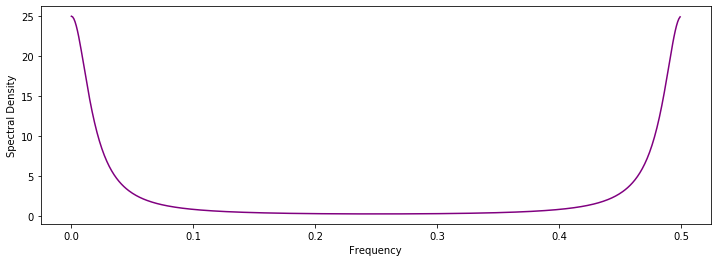

In [3]:
f = np.arange(0, 1/2, step=1e-3)
d = spectral_density_ar2(0, 0.8)(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='purple')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

# print('Peak: %.3f' % f[np.argmax(d)])

This spectral density has peaks at both frequency 0 and 0.5.  This suggests two components, one oscillating rapidly and one changing values slowly.

**Exercise 13.22**. Graph the theoretical spectral density for an AR(2) process with $\phi_1 = 0.8$ and $\phi_2 =
−0.2$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.

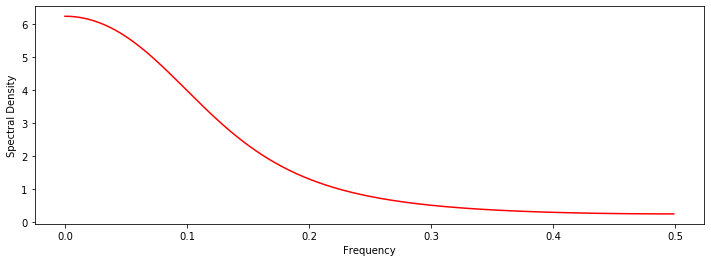

Peak: 0.000


In [4]:
f = np.arange(0, 1/2, step=1e-3)
d = spectral_density_ar2(0.8, -0.2)(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='red')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

print('Peak: %.3f' % f[np.argmax(d)])

The process has highest spectral density at frequency 0, with density much higher for lower frequencies than higher frequencies. A process with this characteristic tends to change slowly.

**Exercise 13.23**.  Graph the theoretical spectral density for an ARMA(1,1) time series with $\phi = 0.5$ and $\theta = 0.8$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.  We can combine the spectral density functions of the AR(1) and MA(1) process to obtain the spectral density function of the ARMA(1) process, also given in Equation (13.5.10):

$$ S(f) = \frac{1 + \theta^2 - 2 \theta \cos (2 \pi f)}{1 + \phi^2 - 2 \phi \cos(2 \pi f)} \sigma_e^2 $$

In [5]:
def spectral_density_arma11(phi, theta):
    def s(f):
        c = np.cos(2 * np.pi * f)
        return (1 + theta**2 - 2 * theta * c) / (1 + phi**2 - 2 * phi * c)
    
    return s

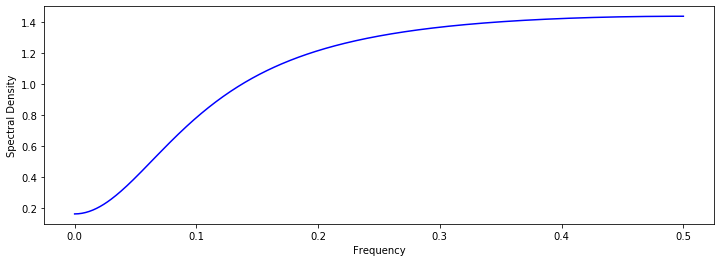

Peak: 0.500


In [6]:
f = np.arange(0, 1/2 + 1e-3, step=1e-3)
d = spectral_density_arma11(0.5, 0.8)(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

print('Peak: %.3f' % f[np.argmax(d)])

The process has highest spectral density at frequency 0, with density much higher for higher frequencies than lower frequencies. A process with this characteristic tends to oscillate quickly.

**Exercise 13.24**.  Graph the theoretical spectral density for an ARMA(1,1) process with $\phi = 0.95$ and $\theta = 0.8$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.

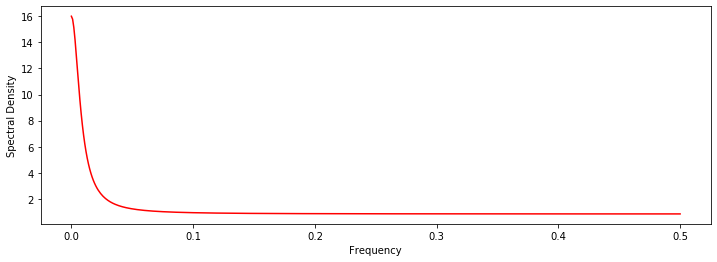

Peak: 0.000


In [7]:
f = np.arange(0, 1/2 + 1e-3, step=1e-3)
d = spectral_density_arma11(0.95, 0.8)(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='red')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

print('Peak: %.3f' % f[np.argmax(d)])

The process has highest spectral density at frequency 0, with density much higher for lower frequencies than higher frequencies. A process with this characteristic tends to change slowly.

**Exercise 13.25**.  Let $\{X_t\}$ be a stationary time series and $\{Y_t\}$ be defined by $Y_t = (X_t + X_{t-1}) / 2$.

**(a)** Find the power transfer function for this linear filter.

**(b)** Is this a causal filter?

**(c)** Graph the power transfer function and describe the effect of using this filter.  That is, what frequencies will be retained (emphasized) and what frequencies will be deemphasized (attenuated) by this filtering?

**Solution**.

**(a)**  We have $c_0 = 1/2$, $c_1 = 1/2$ and $Y_t = c_0 X_t + c_1 X_{t-1}$.  Therefore the power transfer function for the linear filter is given by

$$ |C(e^{-2\pi i f})|^2 = \left(\frac{1}{2} + \frac{1}{2}e^{-2\pi if}\right)^2 = \frac{1}{2} (1 + \cos(2 \pi f) $$

**(b)** Yes, since $c_k = 0$ for $k < 0$ -- that is, values of $Y_t$ do not "look ahead" in the sequence of $X_t$.

**(c)**

In [8]:
def power_transfer_function(f):
    return (1 + np.cos(2 * np.pi * f)) / 2

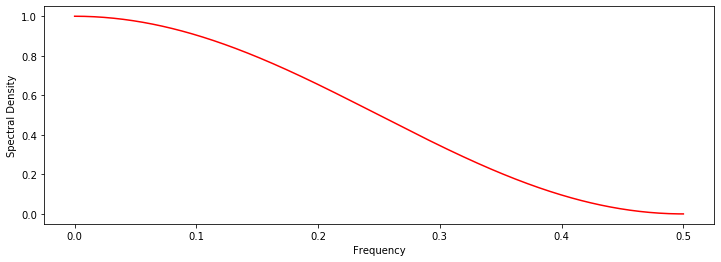

Peak: 0.000


In [9]:
f = np.arange(0, 1/2 + 1e-3, step=1e-3)
d = power_transfer_function(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='red')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

print('Peak: %.3f' % f[np.argmax(d)])

This behaves as a low-pass filter, smoothing out the sequence / retaining lower frequency components and dropping higher frequency components.

**Exercise 13.26**.  Let $\{X_t\}$ be a stationary time series and $\{Y_t\}$ be defined by $Y_t = X_t - X_{t-1}$.

**(a)** Find the power transfer function for this linear filter.

**(b)** Is this a causal filter?

**(c)** Graph the power transfer function and describe the effect of using this filter.  That is, what frequencies will be retained (emphasized) and what frequencies will be deemphasized (attenuated) by this filtering?

**Solution**.

**(a)**  We have $c_0 = 1$, $c_1 = -1$ and $Y_t = c_0 X_t + c_1 X_{t-1}$.  Therefore the power transfer function for the linear filter is given by

$$ |C(e^{-2\pi i f})|^2 = \left(1 - e^{-2\pi if}\right)^2 = 2 - 2 \cos(2 \pi f) $$

**(b)** Yes, since $c_k = 0$ for $k < 0$ -- that is, values of $Y_t$ do not "look ahead" in the sequence of $X_t$.

**(c)**

In [10]:
def power_transfer_function(f):
    return 2 - 2 * np.cos(2 * np.pi * f)

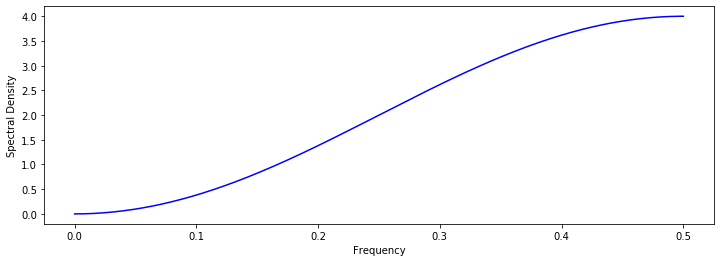

Peak: 0.500


In [11]:
f = np.arange(0, 1/2 + 1e-3, step=1e-3)
d = power_transfer_function(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

print('Peak: %.3f' % f[np.argmax(d)])

This behaves as a high-pass filter, removing longer movements / lower frequencies and retaining higher frequencies.

**Exercise 13.27**.  Let $\{X_t\}$ be a stationary time series and $\{Y_t\}$ be defined by $Y_t = (X_{t+1} + X_t + X_{t-1}) / 3$.

**(a)** Find the power transfer function for this linear filter.

**(b)** Is this a causal filter?

**(c)** Graph the power transfer function and describe the effect of using this filter.  That is, what frequencies will be retained (emphasized) and what frequencies will be deemphasized (attenuated) by this filtering?

**Solution**.

**(a)**  We have $c_{-1} = c_0 = c_1 = 1/3$ and $Y_t = c_{-1} X_{t+1} + c_0 X_t + c_1 X_{t-1}$.  Therefore the power transfer function for the linear filter is given by

$$ |C(e^{-2\pi i f})|^2 = \left(\frac{1}{3} e^{2\pi if} + \frac{1}{3} + \frac{1}{3} e^{-2\pi if}\right)^2 = \frac{1}{9}(1 + 2 \cos (2 \pi f))^2 $$

**(b)** Since $c_{-1} \neq 0$, the filter isn't casual -- calculating $Y_t$ depends on the "future value" $X_{t+1}$.

**(c)**

In [12]:
def power_transfer_function(f):
    return ((1 + 2 * np.cos(2 * np.pi * f)) / 3)**2

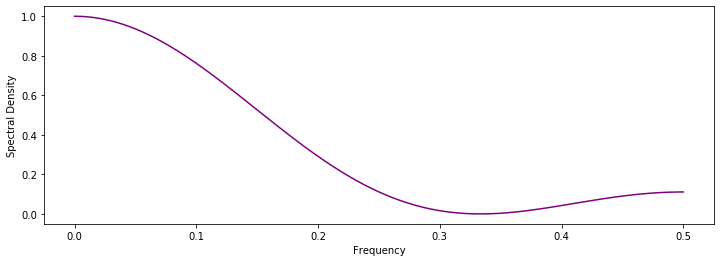

In [13]:
f = np.arange(0, 1/2 + 1e-3, step=1e-3)
d = power_transfer_function(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='purple')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

# print('Peak: %.3f' % f[np.argmax(d)])

This function has a stronger lower frequency component, de-emphasizing frequencies around 0.3, 0.4, but less so for higher frequencies.

**Exercise 13.28**.  Let $\{X_t\}$ be a stationary time series and $\{Y_t\}$ be defined by $Y_t = (X_t + X_{t-1} + X_{t-2}) / 3$.

**(a)** Show that the power transfer function of this filter is the same as the power transfer function of the filter defined in Exercise 13.27.

**(b)** Is this a causal filter?

**Solution**.

**(a)**  Now we have $c_0 = c_1 = c_2 = 1/3$, and $Y_t = c_0 X_t + c_1 X_{t-1} + c_2 X_{t-2}$, so the power function is

$$ |C(e^{-2\pi i f})|^2 = \left(\frac{1}{3} + \frac{1}{3} e^{-2\pi if} + \frac{1}{3} e^{-4\pi if}\right)^2 = \frac{1}{9}(1 + 2 \cos (2 \pi f))^2 $$

which is the same as the power function obtained in Exercise 13.27.

**(b)** Yes -- now all $c_k = 0$ for $k < 0$.

**Exercise 13.29**.  Let $\{X_t\}$ be a stationary time series and let $Y_t = X_t - X_{t-4}$ define $\{Y_t\}$

**(a)** Find the power transfer function for this linear filter.

**(b)** Graph the power transfer function and describe the effect of using this filter.  That is, what frequencies will be retained (emphasized) and what frequencies will be deemphasized (attenuated) by this filtering?

**Solution**.

**(a)**  We have $c_0 = 1$, $c_4 = -1$, and $Y_t = c_0 X_t + c_4 X_{t - 4}$, so the power transfer function is

$$ |C(e^{-2\pi if})|^2 = \left(1 - e^{-8\pi if} \right)^2 = 2 - 2 \cos(8 \pi f)$$

**(b)**

In [14]:
def power_transfer_function(f):
    return 2 - 2 * np.cos(8 * np.pi * f)

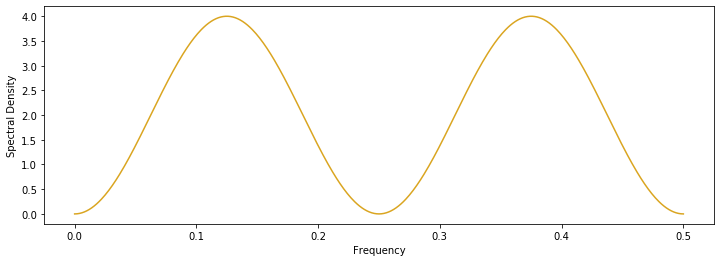

In [15]:
f = np.arange(0, 1/2 + 1e-3, step=1e-3)
d = power_transfer_function(f)

plt.figure(figsize=(12, 4))
plt.plot(f, d, color='goldenrod')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

# print('Peak: %.3f' % f[np.argmax(d)])

The filter will attenuate low and high frequencies, but it will also attenuate frequencies around 1/4 -- instead retaining the frequencies around 1/8 and 3/8.